In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [22]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [23]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [24]:
# Save references to each table
M = Base.classes.measurement
S = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
lastdate = session.query(func.max(M.date)).first()
print(lastdate)
lastdate = lastdate[0]

('2017-08-23',)


In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
preyear = dt.datetime.strptime(lastdate, '%Y-%m-%d').date() - dt.timedelta(days = 365) 

# Perform a query to retrieve the data and precipitation scores
results = session.query(M.date, M.prcp).filter(M.date >= preyear, M.date < lastdate).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
#df = pd.DataFrame(results).dropna().set_index('date')
df = pd.DataFrame(results, columns=['date', 'prcp']).set_index('date')

# Sort the dataframe by date
df = df.sort_index()



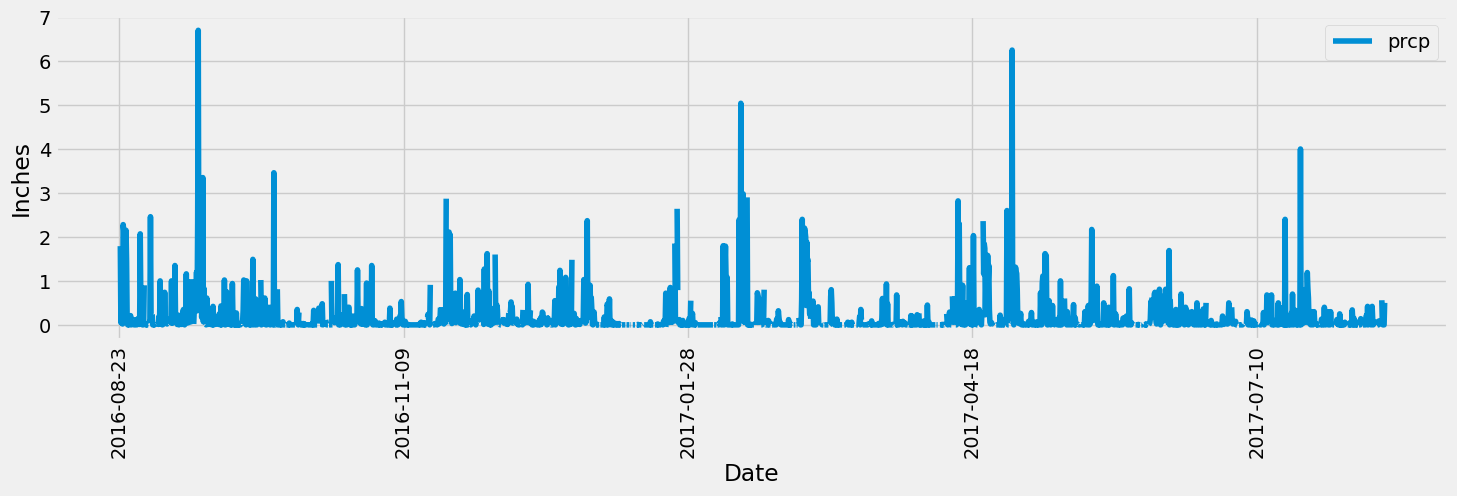

In [50]:

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, figsize=[16,4])
plt.xlabel('Date')
plt.ylabel('Inches');

In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df.describe()
summary_statistics

,prcp
count,2017.000000
mean,0.177367
std,0.461568
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(M.station.distinct())).scalar()
total_stations

9

In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(M.station, func.count(M.station)).\
                        group_by(M.station).\
                        order_by(func.count(M.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest,and average temperature.
session.query(func.min(M.tobs),func.max(M.tobs),func.avg(M.tobs)).filter(M.station== 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

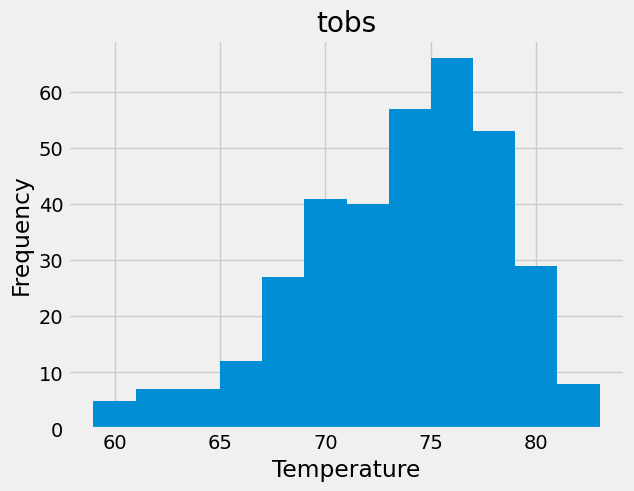

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as 
#a histogram
results= session.query(M.tobs).filter((M.station== 'USC00519281')&(M.date >= '2016-08-23')).all()
pd.DataFrame(results).hist(bins =12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Close Session

In [ ]:
# Close Session
session.close()